In [1]:
import pandas as pd
import numpy as np


In [2]:
person = {
    "first" : ["John","Mark","Jason"],
    "last" : ["Cena","Johnson","Born"],
    "email" : ["a","b","c"]
    }

print(person)
print(person["first"])



df = pd.DataFrame(person)
df

{'first': ['John', 'Mark', 'Jason'], 'last': ['Cena', 'Johnson', 'Born'], 'email': ['a', 'b', 'c']}
['John', 'Mark', 'Jason']


,first,last,email
0,John,Cena,a
1,Mark,Johnson,b
2,Jason,Born,c


# Accessing a columns

In [3]:
df['first'] 
# df.Email      ---> This will also work. But prefer the one above

0     John
1     Mark
2    Jason
Name: first, dtype: object

In [4]:
type(df['first'])

pandas.core.series.Series

In [5]:
df.columns

Index(['first', 'last', 'email'], dtype='object')

# iloc and loc functions to locate a row/column/value

In [6]:
df.iloc[0]

first    John
last     Cena
email       a
Name: 0, dtype: object

In [7]:
df.iloc[[0,1]]

,first,last,email
0,John,Cena,a
1,Mark,Johnson,b


In [8]:
df.loc[0]
#df.loc['email']

first    John
last     Cena
email       a
Name: 0, dtype: object

In [9]:
df['email']
df[['first','last']]

,first,last
0,John,Cena
1,Mark,Johnson
2,Jason,Born


In [10]:
#df.set_index('email', inplace=True)

In [11]:
df

,first,last,email
0,John,Cena,a
1,Mark,Johnson,b
2,Jason,Born,c


In [12]:
#df.loc['a',['first','last']]

In [13]:
df

,first,last,email
0,John,Cena,a
1,Mark,Johnson,b
2,Jason,Born,c


# Filtering - & and | Operators

In [14]:
# df['last'] == 'Born'
'''0    False
1    False
2     True
Name: last, dtype: bool '''

df['last']

filt = (df['last'] == 'Born') | (df['last'] == 'Cena')

df[df['last'] == 'Born']
df[filt]
df.loc[filt]
df.loc[~filt]

df[filt]['last']

0    Cena
2    Born
Name: last, dtype: object

In [15]:
df.columns = ['first name','last name','email']
df.columns

Index(['first name', 'last name', 'email'], dtype='object')

# Renaming Columns

In [16]:
df.columns = [x.upper() for x in df.columns ]
df.columns = [x.lower() for x in df.columns ]
df.columns

Index(['first name', 'last name', 'email'], dtype='object')

In [17]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['first_name', 'last_name', 'email'], dtype='object')

# Renaming Columns Using Rename Method

In [18]:
df.rename(columns={'first_name':'first', 'last_name' : 'last'} , inplace=True)
#df

In [19]:
df.loc[2] = ['Jason','Borne','d']
# df.loc[2,['last','email']] = ['Z','c']
df.loc[2,'email'] = 'c'
df.at[2,'email'] = 'd'
df


,first,last,email
0,John,Cena,a
1,Mark,Johnson,b
2,Jason,Borne,d


In [20]:
# df['last'].str.lower()
df['last'] = df['last'].str.upper()
df

,first,last,email
0,John,CENA,a
1,Mark,JOHNSON,b
2,Jason,BORNE,d


# Apply function

In [21]:
df['first'].apply(len)

0    4
1    4
2    5
Name: first, dtype: int64

In [22]:
def update_email(email):
    return email.upper()


df['email'] =  df['email'].apply(update_email)
df

,first,last,email
0,John,CENA,A
1,Mark,JOHNSON,B
2,Jason,BORNE,D


# Lambda Functions

In [23]:
df['email'] =  df['email'].apply(lambda x: x.lower())
df['last'] =  df['last'].apply(lambda x: x.lower())
df

,first,last,email
0,John,cena,a
1,Mark,johnson,b
2,Jason,borne,d


In [24]:
df.apply(pd.Series.min)

first    Jason
last     borne
email        a
dtype: object

In [25]:
df.apply(lambda x: x.min())
#df

first    Jason
last     borne
email        a
dtype: object

# Applymap Function - Applied to DataFrame

In [26]:
df.applymap(len)
#df

,first,last,email
0,4,4,1
1,4,7,1
2,5,5,1


In [27]:
df.applymap(str.lower)
#df

,first,last,email
0,john,cena,a
1,mark,johnson,b
2,jason,borne,d


# map and replace functions to update values

In [28]:
df['first'].map({'John' : 'Keval', 'Mark' : 'Mellow'}) 

0     Keval
1    Mellow
2       NaN
Name: first, dtype: object

In [29]:
df['first'].replace({'John' : 'Keval', 'Mark' : 'Mellow'}) 

0     Keval
1    Mellow
2     Jason
Name: first, dtype: object

In [30]:
df['full_name'] = df['first'] + ' ' + df['last']

In [31]:
df

,first,last,email,full_name
0,John,cena,a,John cena
1,Mark,johnson,b,Mark johnson
2,Jason,borne,d,Jason borne


# Drop Columns & Add New Column

In [32]:
df.drop(columns=['first','last'],inplace = True)

In [33]:
df['full_name'].str.split(' ', expand=True)

,0,1
0,John,cena
1,Mark,johnson
2,Jason,borne


In [34]:
df[['first','last']] = df['full_name'].str.split(' ', expand=True)
df

,email,full_name,first,last
0,a,John cena,John,cena
1,b,Mark johnson,Mark,johnson
2,d,Jason borne,Jason,borne


# Append Data

In [35]:
df = df.append({'first':'Philip'},ignore_index=True)

In [36]:
people = {
    "first" : ["Tony","Steve","Nick"],
    "last" : ["Stark","Smith","Stark"],
    "email" : ["a@a","b@b","c@c"]
    }

df2 = pd.DataFrame(people)
df2

,first,last,email
0,Tony,Stark,a@a
1,Steve,Smith,b@b
2,Nick,Stark,c@c


In [37]:
# df.append(df2, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)

In [38]:
df

,email,full_name,first,last
0,a,John cena,John,cena
1,b,Mark johnson,Mark,johnson
2,d,Jason borne,Jason,borne
3,NaN,NaN,Philip,NaN
4,a@a,NaN,Tony,Stark
5,b@b,NaN,Steve,Smith
6,c@c,NaN,Nick,Stark


In [39]:
#df.drop(index=4) # df.drop(index=4,inplace = True) <- For permanent Delete

In [40]:
filt = df['last']=='Smith'

df.drop(index=df[filt].index)

# Alternate Method
# filt = df[df['last']=='Smith'].index
# df.drop(filt)

,email,full_name,first,last
0,a,John cena,John,cena
1,b,Mark johnson,Mark,johnson
2,d,Jason borne,Jason,borne
3,NaN,NaN,Philip,NaN
4,a@a,NaN,Tony,Stark
6,c@c,NaN,Nick,Stark


# Sorting Data

In [41]:
# df.sort_values(by=['last','email'],ascending=[False,True])   <- This will also work
df.sort_values(by=['last','email'],ascending=[0,1])

,email,full_name,first,last
1,b,Mark johnson,Mark,johnson
0,a,John cena,John,cena
2,d,Jason borne,Jason,borne
4,a@a,NaN,Tony,Stark
6,c@c,NaN,Nick,Stark
5,b@b,NaN,Steve,Smith
3,NaN,NaN,Philip,NaN


In [42]:
df.sort_index()

,email,full_name,first,last
0,a,John cena,John,cena
1,b,Mark johnson,Mark,johnson
2,d,Jason borne,Jason,borne
3,NaN,NaN,Philip,NaN
4,a@a,NaN,Tony,Stark
5,b@b,NaN,Steve,Smith
6,c@c,NaN,Nick,Stark


In [43]:
# df['last'].dropna().unique()  <-Ommiting NaN values from dataframe
df['last'].unique()

array(['cena', 'johnson', 'borne', nan, 'Stark', 'Smith'], dtype=object)

In [44]:
df

,email,full_name,first,last
0,a,John cena,John,cena
1,b,Mark johnson,Mark,johnson
2,d,Jason borne,Jason,borne
3,NaN,NaN,Philip,NaN
4,a@a,NaN,Tony,Stark
5,b@b,NaN,Steve,Smith
6,c@c,NaN,Nick,Stark


In [45]:
df['dummy'] = 2
df['dummy'].median()

2.0

In [46]:
df

,email,full_name,first,last,dummy
0,a,John cena,John,cena,2
1,b,Mark johnson,Mark,johnson,2
2,d,Jason borne,Jason,borne,2
3,NaN,NaN,Philip,NaN,2
4,a@a,NaN,Tony,Stark,2
5,b@b,NaN,Steve,Smith,2
6,c@c,NaN,Nick,Stark,2


In [47]:
df['dummy'].count()

7

In [48]:
filt = df['email'] == 'a'

# df = df[filt]['dummy'] = 4
df.loc[filt,'dummy'] = 4


filt = df['email'] == 'b'
df.loc[filt,'dummy'] = 6

filt = df['email'] == 'c'
df.loc[filt,'dummy'] = 0

filt = df['email'] == 'a@a'

import numpy as np
df.loc[filt,'dummy'] = np.nan

In [49]:
df

,email,full_name,first,last,dummy
0,a,John cena,John,cena,4.0
1,b,Mark johnson,Mark,johnson,6.0
2,d,Jason borne,Jason,borne,2.0
3,NaN,NaN,Philip,NaN,2.0
4,a@a,NaN,Tony,Stark,NaN
5,b@b,NaN,Steve,Smith,2.0
6,c@c,NaN,Nick,Stark,2.0


In [50]:
df['dummy'].count()

6

In [51]:
df['dummy'].unique()
df['dummy'].dropna().unique()
df['dummy'].median()

2.0

In [52]:
df.describe()

,dummy
count,6.00000
mean,3.00000
std,1.67332
min,2.00000
25%,2.00000
50%,2.00000
75%,3.50000
max,6.00000


# ====================================================
# Data Cleaning - Casting Datatypes and Handling Missing Values
# ====================================================

In [53]:
import numpy as np
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}

In [54]:
df = pd.DataFrame(people)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [55]:
df.dropna()
df.dropna(axis='index',how='any')
df.dropna(how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [56]:
df['dummy'] = np.nan
df

,first,last,email,age,dummy
0,Corey,Schafer,CoreyMSchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@email.com,55,NaN
2,John,Doe,JohnDoe@email.com,63,NaN
3,Chris,Schafer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@email.com,None,NaN
6,NA,Missing,NA,Missing,NaN


In [57]:
df.dropna(axis='columns',how='all')
df.drop(columns='dummy',inplace=True)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [58]:
df.dropna(axis='index',how='any',subset = ['email'])    # how argument does nothing here

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [59]:
df.replace('NA',np.nan, inplace = True)
df.replace('Missing',np.nan, inplace = True)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [60]:
df['first'].isna()
df['first'].isna().sum()

3

In [61]:
type(np.nan)

float

# Change Datatype of a Column

In [62]:
df.dtypes
df['age'].dtypes
df['age']=df['age'].astype(float)
df['age'].dtypes
df.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [63]:
print(df.loc[0][0],df.loc[0][1],df.loc[0][2],df.loc[0][3])

Corey Schafer CoreyMSchafer@gmail.com 33.0


In [64]:
na_vals = ['Missing','NA']

# =====================
# Date and TimeSeries Data
# =====================

In [65]:
# Creating a lambda function to covert the string to datetime for datetime columns
d_parser = lambda x : pd.datetime.strptime(x,'%Y-%m-%d %I-%p')

df = pd.read_csv('D:/Technical/Python/Python-Jupyer_EDA/developer_survey_2019/ETH_1h.csv',parse_dates=['Date'],date_parser=d_parser)

In [66]:
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Datetime Formatting Codes -> https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [67]:
df.loc[0,'Date']
df.loc[0]['Date']   # Same as above statement

Timestamp('2020-03-13 20:00:00')

In [68]:
# df.loc[0]['Date'].day_name() <- Object is not in datetime format. This is currently read as a string



df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

print(df.loc[0]['Date'].year,
      df.loc[0]['Date'].month,
      df.loc[0]['Date'].day,
      df.loc[0]['Date'].day_name())


2020 3 13 Friday


In [69]:
pd.set_option('display.max_rows',5)
df['Date']

df['Date'].dt.day_name()

0          Friday
1          Friday
           ...   
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [70]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
...,...,...,...,...,...,...,...,...
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday
23673,2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87,Saturday


In [71]:
df['Date'].min().year
df['Date'].min()
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [72]:
# df.sort_values(by=['last','email'],ascending=[0,1])
filt = (df['Date'] >= '2020')
df.loc[filt].sort_values(by='Date',ascending=True)
# df.loc[filt].sort_index()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1748,2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday
...,...,...,...,...,...,...,...,...
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday


In [73]:
ti = pd.to_datetime('2020-12-30')
ti

Timestamp('2020-12-30 00:00:00')

In [74]:
df.set_index('Date',inplace=True)
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
...,...,...,...,...,...,...,...
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87,Saturday


In [75]:
df['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday
2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,Tuesday


In [76]:
df['2018':'2020']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
...,...,...,...,...,...,...,...
2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday
2018-01-01 00:00:00,ETHUSD,741.27,741.27,733.69,734.59,2697546.48,Monday


In [77]:
df['2020-01':'2020-02']['Close']
df['2020-01':'2020-02']['Close'].mean()

195.16559027777814

Pandas Date Offset Codes ->
'''https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects'''

In [78]:
highs=df['High'].resample('D').max()
highs['2020-01-01']

132.68

# matplotlib sample

In [79]:
%matplotlib inline

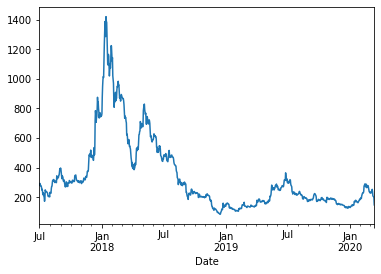

In [80]:
highs.plot()

# Resampling multiple columns - using resample and agg methods

In [81]:
# df.resample('W').mean()

df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
...,...,...,...,...
2020-03-08,229.817619,253.01,196.00,2.736569e+08
2020-03-15,176.332821,208.65,90.00,4.983998e+08


In [83]:
# conda install xlwt openpyxl xlrd